In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [27]:
K = 64 # number of OFDM subcarriers
CP = K//4  # length of the cyclic prefix
P = 8 # number of pilot carriers per OFDM block
pilotValue = 1+1j # value each pilot transmits

In [28]:
allCarriers = np.arange(K)  # ([0, 1, ... K-1])
print ("All Carriers:   %s" % allCarriers)

All Carriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [29]:
pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier
print ("Pilot Carriers: %s" % pilotCarriers)

Pilot Carriers: [ 0  8 16 24 32 40 48 56]


In [30]:
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1
print ("Pilot Carriers: %s" % pilotCarriers)

Pilot Carriers: [ 0  8 16 24 32 40 48 56 63]


In [31]:
dataCarriers = np.delete(allCarriers, pilotCarriers)
print ("Data Carriers:  %s" % dataCarriers)

Data Carriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


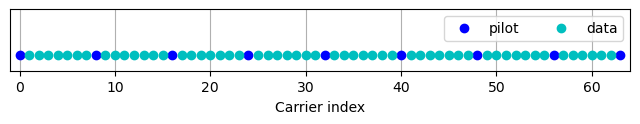

In [32]:
plt.figure(figsize=(8,0.8))
plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'co', label='data')
plt.legend(fontsize=10, ncol=2)
plt.xlim((-1,K)); plt.ylim((-0.1, 0.3))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True)
plt.savefig("pilots.png")

In [33]:
mu = 2 # bits per symbol

In [34]:
payloadBits_per_OFDM = len(dataCarriers)*mu  #no.of payload bits per OFDM symbol
print ("Number of Payload Bits per OFDM Symbol:  %s" % payloadBits_per_OFDM)

Number of Payload Bits per OFDM Symbol:  110


In [35]:
mapping_table = {
    (0,0) : 1+1j,
    (0,1) : 1-1j,
    (1,1) : -1-1j,
    (1,0) : -1+1j,
}

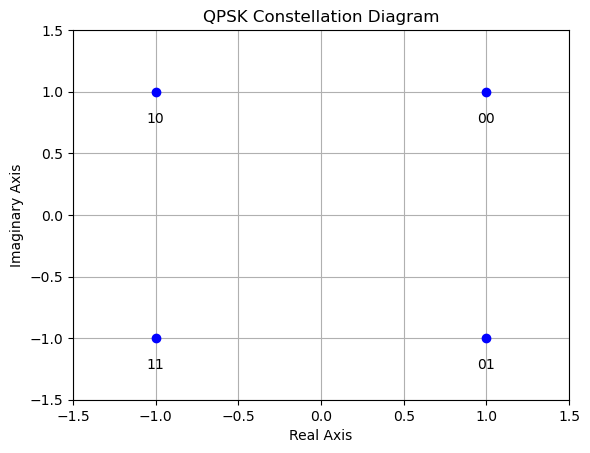

In [36]:
for b1 in [0, 1]:
    for b0 in [0, 1]:
        B = (b1, b0)
        Q = mapping_table[B]
        plt.plot(Q.real, Q.imag, 'bo')
        plt.text(Q.real, Q.imag-0.25, "".join(str(x) for x in B), ha='center')
        plt.xlabel('Real Axis')
        plt.ylabel('Imaginary Axis')
        plt.xlim(-1.5,1.5)
        plt.ylim(-1.5,1.5)
        plt.grid(True)
        plt.title("QPSK Constellation Diagram")

In [37]:
demapping_table = {v : k for k, v in mapping_table.items()}
print ("demapping:  %s" %demapping_table)

demapping:  {(1+1j): (0, 0), (1-1j): (0, 1), (-1-1j): (1, 1), (-1+1j): (1, 0)}


In [38]:
SNRdb = 15

Text(0.5, 1.0, 'Channel Frequency Response Graph')

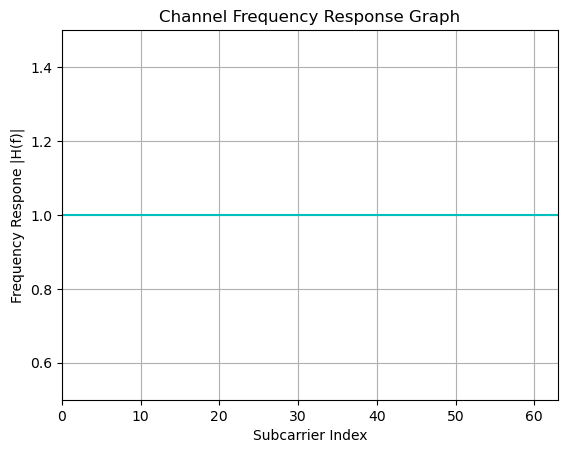

In [39]:
channelResponse = np.array([1, 0])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, K)
plt.plot(allCarriers, abs(H_exact),'c')
plt.xlabel('Subcarrier Index')
plt.ylabel('Frequency Respone |H(f)|')
plt.xlim(0, 63)
plt.ylim(0.5, 1.5)
plt.grid(True)
plt.title("Channel Frequency Response Graph")

In [40]:
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
print ("Bits count: ", len(bits))
print ("Data Bits: ", bits)
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

Bits count:  110
Data Bits:  [0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1]
Mean of bits (should be around 0.5):  0.5727272727272728


In [41]:
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))

In [42]:
bits_SP = SP(bits)
print ("First 10 Bit groups/Tx Symbols \n", bits_SP[:20])

First 10 Bit groups/Tx Symbols 
 [[0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]]


In [43]:
def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
MappedSymbols = Mapping(bits_SP)
print ("First 10 QPSK Symbols \n", bits_SP[:10])
print ("First 10 QPSK Symbols \n", MappedSymbols[:10])

First 10 QPSK Symbols 
 [[0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]]
First 10 QPSK Symbols 
 [ 1.-1.j -1.+1.j  1.-1.j -1.+1.j  1.-1.j  1.-1.j  1.+1.j  1.-1.j -1.-1.j
 -1.+1.j]


In [44]:
def OFDM_symbol(payload):
    symbol = np.zeros(K, dtype=complex) # the overall K subcarriers
    
    symbol[pilotCarriers] = pilotValue  # allocate the pilot subcarriers 
    symbol[dataCarriers] = payload  # allocate the data carriers    
    return symbol
    
OFDM_data = OFDM_symbol(MappedSymbols)
print ("Number of OFDM carriers in frequency domain: ", len(OFDM_data))

Number of OFDM carriers in frequency domain:  64


In [45]:
def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)

In [46]:
OFDM_time = IDFT(OFDM_data)
print ("Number of OFDM samples in time-domain before CP: ", len(OFDM_time))

Number of OFDM samples in time-domain before CP:  64


In [47]:
def addCP(OFDM_time):
    cp = OFDM_time[-CP:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning
OFDM_withCP = addCP(OFDM_time)
print ("Number of OFDM samples in time domain with CP: ", len(OFDM_withCP))

Number of OFDM samples in time domain with CP:  80


In [48]:
def channel(signal):
    convolved = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    print ("RX Signal power: %.4f, Noise power: %.4f" %(signal_power, sigma2))
    noise = np.sqrt(sigma2/2)*(np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape)) # Generate complex noise with given variance
    return convolved + noise

RX Signal power: 0.0311, Noise power: 0.0010


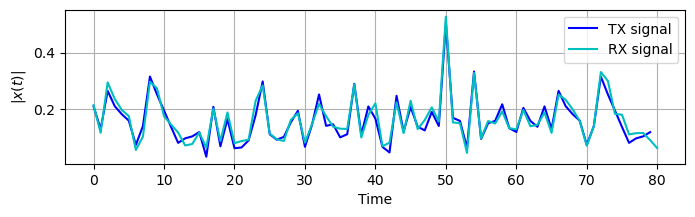

In [49]:
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)
plt.figure(figsize=(8,2))
plt.plot(abs(OFDM_TX),'b',label='TX signal')
plt.plot(abs(OFDM_RX),'c',label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('Time'); 
plt.ylabel('$|x(t)|$');
plt.grid(True);

In [50]:
def removeCP(signal):
    return signal[CP:(CP+K)]
OFDM_RX_noCP = removeCP(OFDM_RX)

In [51]:
def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod = DFT(OFDM_RX_noCP)

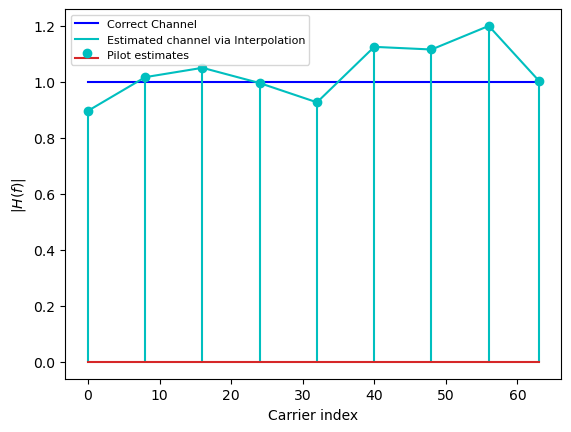

In [52]:
def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  # extract the pilot values from the RX signal
    Hest_at_pilots = pilots / pilotValue # divide by the transmitted pilot values
    Hest_abs = scipy.interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
    Hest_phase = scipy.interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)
    
    plt.plot(allCarriers, abs(H_exact),'b', label='Correct Channel')
    plt.stem(pilotCarriers, abs(Hest_at_pilots),'co', label='Pilot estimates')
    plt.plot(allCarriers, abs(Hest), 'c', label='Estimated channel via Interpolation')
    plt.xlabel('Carrier index'); 
    plt.ylabel('$|H(f)|$'); 
    plt.legend(fontsize=8)
    
    return Hest
Hest = channelEstimate(OFDM_demod)

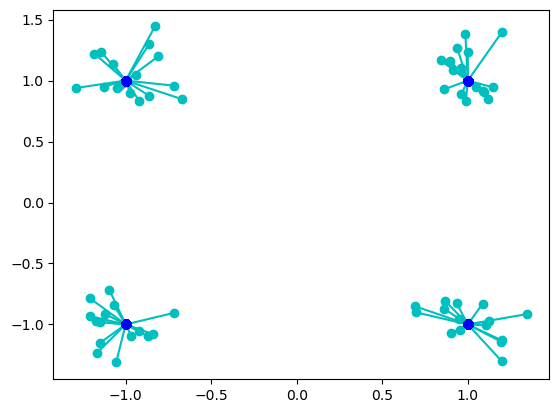

In [53]:
def Demapping(QAM):
    # array of possible constellation points
    constellation = np.array([x for x in demapping_table.keys()])
    
    # calculate distance of each RX point to each possible point
    dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))
    
    # for each element in QAM, choose the index in constellation 
    # that belongs to the nearest constellation point
    const_index = dists.argmin(axis=1)
    
    # get back the real constellation point
    hardDecision = constellation[const_index]
    
    # transform the constellation point into the bit groups
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision

PS_est, hardDecision = Demapping(OFDM_demod)
for qam, hard in zip(OFDM_demod, hardDecision):
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'c-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'bo')

In [54]:
def PS(bits):
    return bits.reshape((-1,))
bits_est = PS(PS_est)

In [55]:
indices_to_remove = []
for i in range(0, len(bits_est), 16):
    indices_to_remove.append(i)       # Remove the i-th index (0, 16, 32, ...)
    indices_to_remove.append(i + 1)   # Remove the (i+1)-th index (1, 17, 33, ...)

# Use np.delete to remove those indices from bits_est
databits_est = np.delete(bits_est, indices_to_remove)

In [56]:
count=0
for i in range(len(bits)):
    if(bits[i]!=databits_est[i]):
        count=count+1
BER=count/len(bits)
print("BER is: "+str(BER))

BER is: 0.0


In [57]:
BER_values.append(BER)

In [58]:
bits

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [59]:
len(bits)

110

In [60]:
bits_est

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [61]:
databits_est

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0])

In [62]:
len(databits_est)

112